In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics
import statsmodels.api as sm

In [2]:
data = pd.read_csv("C:/Users/Werner Soon Shi Xu/Downloads/EthBit (1).csv")
data.head()

,Date,EthOpen,EthHigh,EthLow,EthClose,EthAdjClose,EthVolume,BitOpen,BitHigh,BitLow,BitClose,BitAdjClose,BitVolume
0,10/11/17,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5.208250e+09
1,11/11/17,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4.908680e+09
2,12/11/17,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8.957350e+09
3,13/11/17,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6.263250e+09
4,14/11/17,316.763000,340.177002,316.763000,337.631012,337.631012,1.069680e+09,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09


In [3]:
# Calculate Ethereum price
data['EthPrice'] = (data['EthHigh'] + data['EthLow']) / 2

# Calculate Bitcoin price
data['BitPrice'] = (data['BitHigh'] + data['BitLow']) / 2

# Create a new DataFrame with just the Date, Ethereum price, and Bitcoin price
eth_bit_prices = data[['Date', 'EthPrice', 'BitPrice']].copy()

# Display the new DataFrame
print(eth_bit_prices)


          Date     EthPrice      BitPrice
0     10/11/17   309.629989   6874.435059
1     11/11/17   308.822495   6538.685059
2     12/11/17   308.833008   6072.029785
3     13/11/17   317.720001   6327.739990
4     14/11/17   328.470001   6613.364990
...        ...          ...           ...
2259   17/1/24  2550.584961  42689.599610
2260   18/1/24  2486.199707  41753.759770
2261   19/1/24  2458.008057  41215.808595
2262   20/1/24          NaN           NaN
2263   21/1/24  2466.985230  41654.150395

[2264 rows x 3 columns]


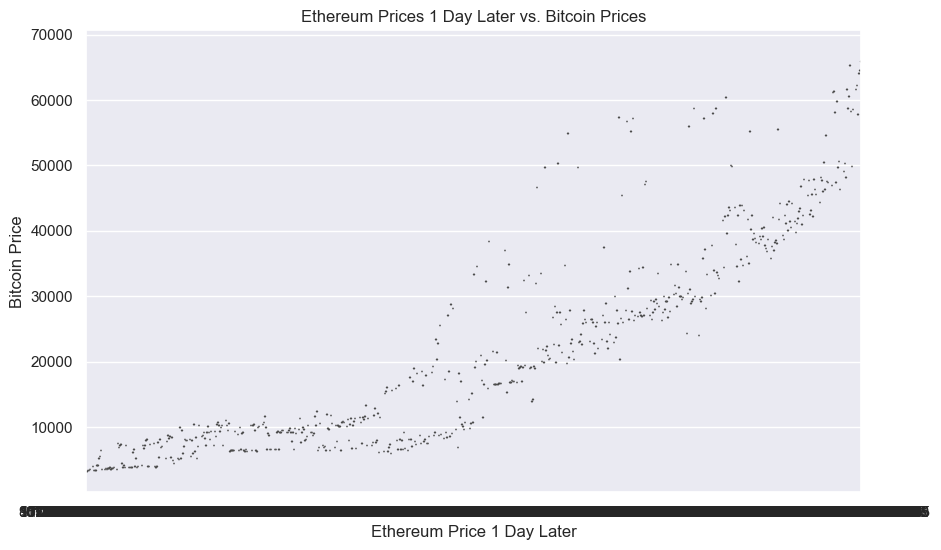

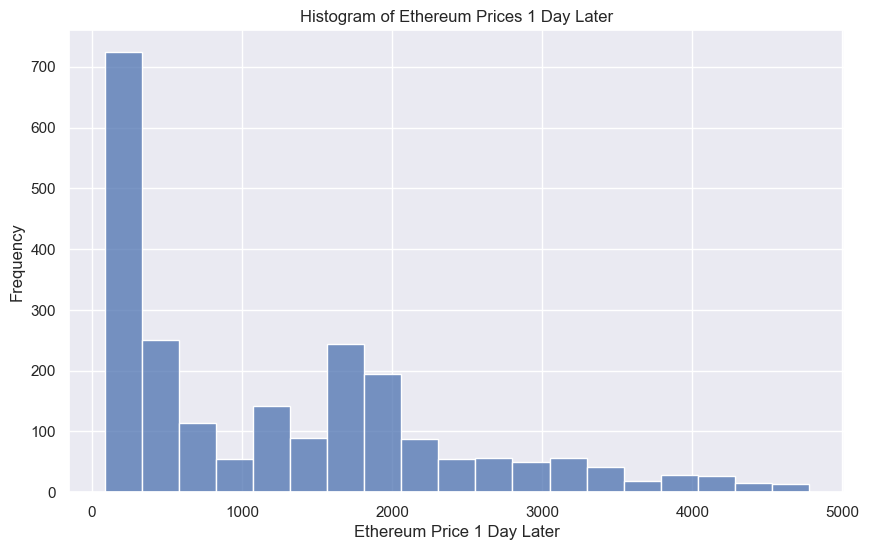

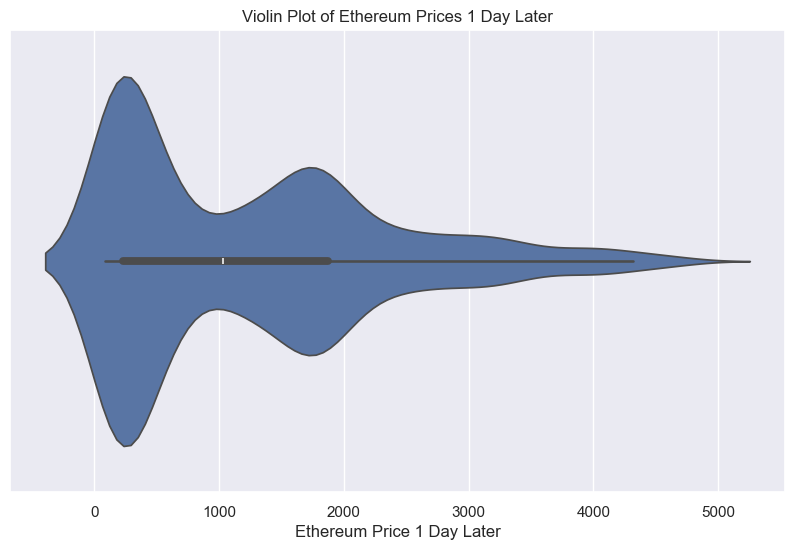

In [4]:
# Shift Ethereum prices by one day to align with Bitcoin prices
eth_bit_prices['EthPriceNextDay'] = eth_bit_prices['EthPrice'].shift(-1)
eth_bit_prices['EthDifference'] = eth_bit_prices['EthPriceNextDay'] - eth_bit_prices['EthPrice']

eth_bit_prices['BtcPriceNextDay'] = eth_bit_prices['BitPrice'].shift(-1)
eth_bit_prices['BtcPctChng'] = (eth_bit_prices['BtcPriceNextDay'] - eth_bit_prices['BitPrice']) / eth_bit_prices['BitPrice']

# Drop the last row to handle NaN values created by shifting
eth_bit_prices.dropna(inplace=True)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=eth_bit_prices['EthPriceNextDay'], y=eth_bit_prices['BitPrice'])
plt.title('Ethereum Prices 1 Day Later vs. Bitcoin Prices')
plt.xlabel('Ethereum Price 1 Day Later')
plt.ylabel('Bitcoin Price')
plt.show()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(x=eth_bit_prices['EthPriceNextDay'])
plt.title('Histogram of Ethereum Prices 1 Day Later')
plt.xlabel('Ethereum Price 1 Day Later')
plt.ylabel('Frequency')
plt.show()

# Plot violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=eth_bit_prices['EthPriceNextDay'])
plt.title('Violin Plot of Ethereum Prices 1 Day Later')
plt.xlabel('Ethereum Price 1 Day Later')
plt.show()

<Figure size 1000x800 with 0 Axes>

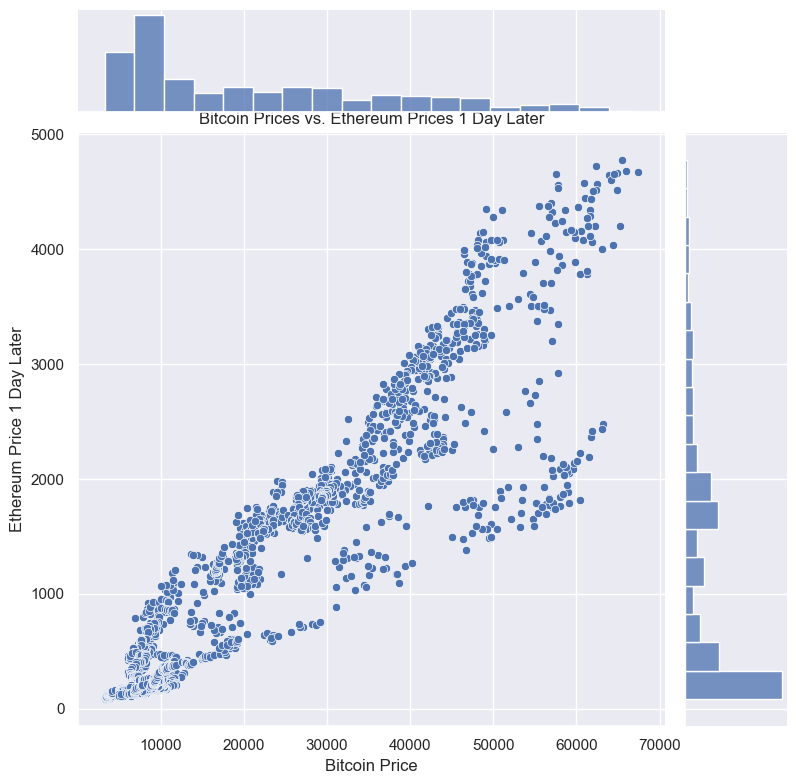

In [5]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a joint plot
sns.jointplot(data=eth_bit_prices, x='BitPrice', y='EthPriceNextDay', height=8, kind='scatter')

# Add title and axis labels
plt.title('Bitcoin Prices vs. Ethereum Prices 1 Day Later')
plt.xlabel('Bitcoin Price')
plt.ylabel('Ethereum Price 1 Day Later')

# Show the plot
plt.show()


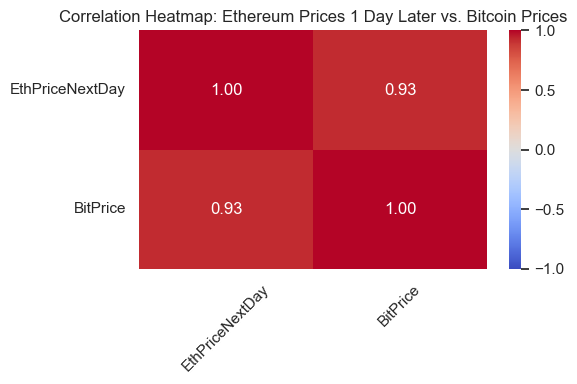

In [6]:
# Select only the 'EthPriceNextDay' and 'BitPrice' columns
selected_columns = eth_bit_prices[['EthPriceNextDay', 'BitPrice']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a heatmap
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')

# Add title and adjust plot settings
plt.title('Correlation Heatmap: Ethereum Prices 1 Day Later vs. Bitcoin Prices')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

### There is a high correlation coefficient between Ethereum prices and Bitcoin prices which suggests a strong linear relationship between the two. In this case, the correlation coefficient close to 1 (0.93 for prices and 0.86 for the volume) which indicates a positive correlation, meaning that as Bitcoin prices increase (or decrease), Ethereum prices tend to increase (or decrease) as well.

Intercept of Regression 	: b =  [-154.32267385]
Coefficients of Regression 	: a =  [[0.06463129]]

  Predictors  Coefficients
0   BitPrice      0.064631



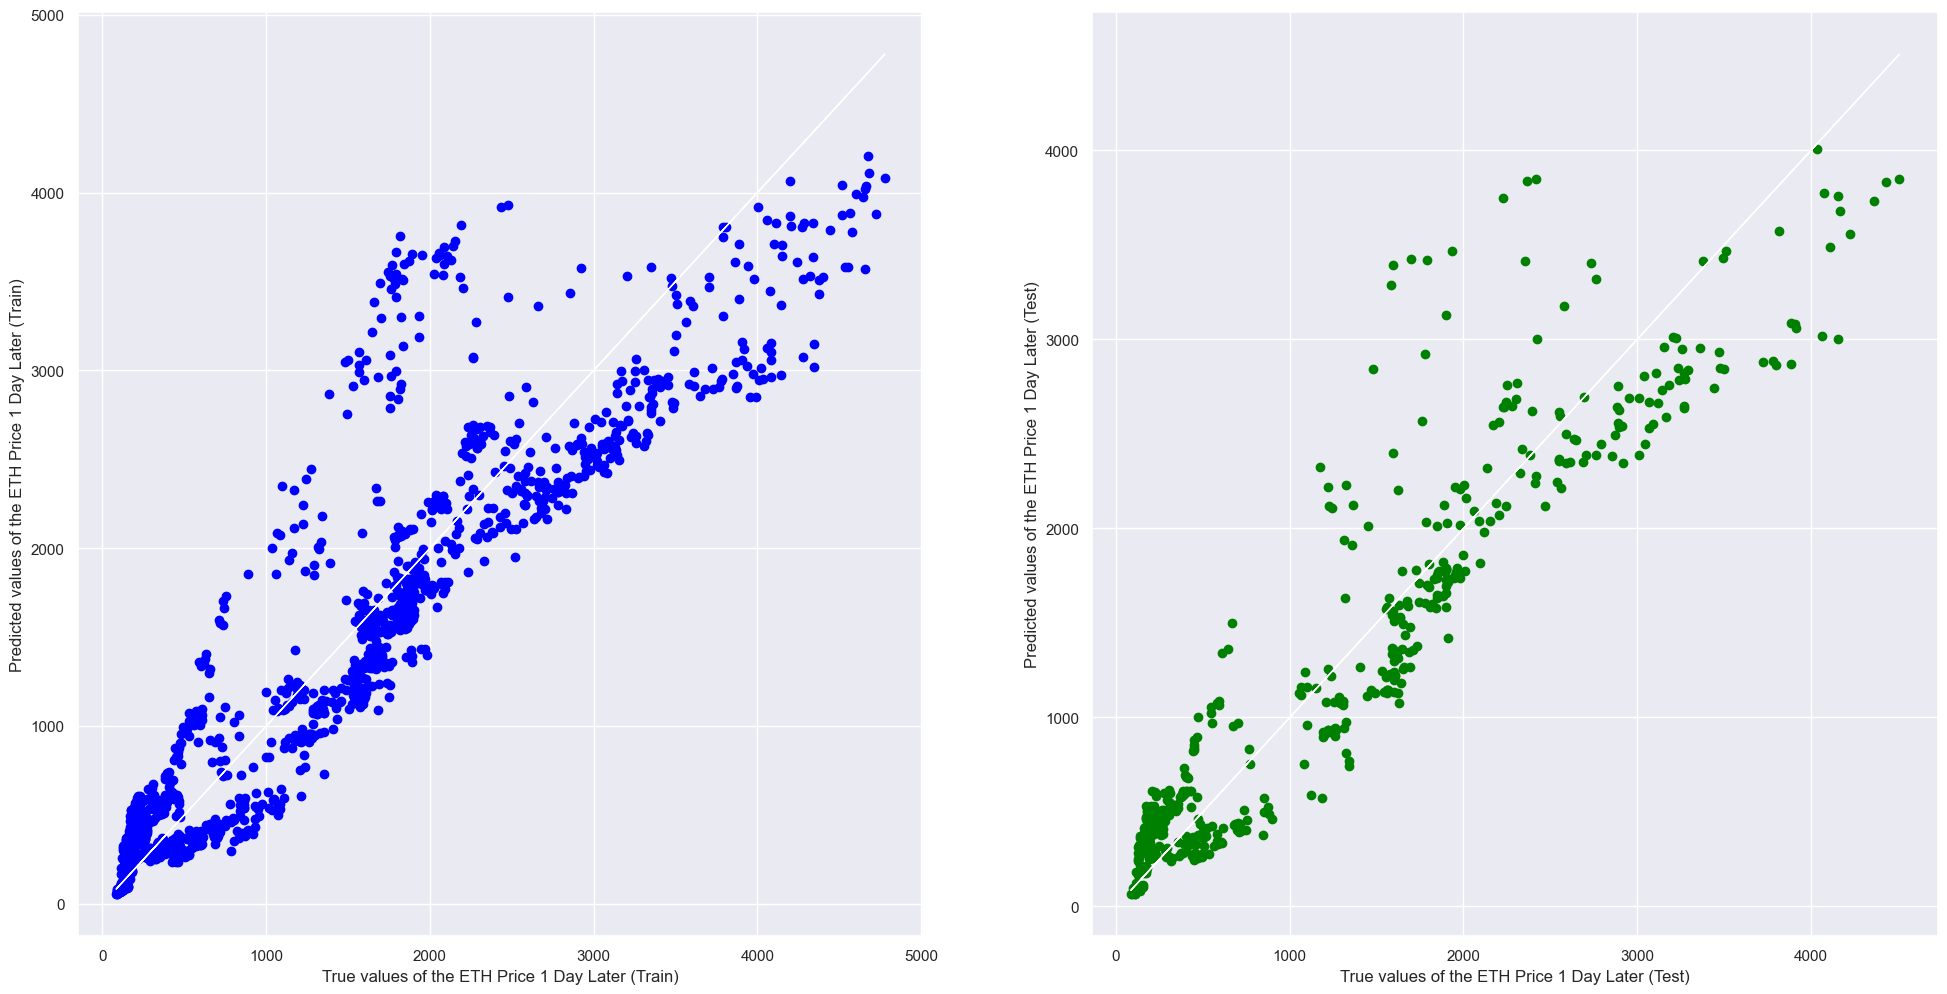

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8513606302083655
Mean Squared Error (MSE) 	: 187984.57565616554

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8769002732780768
Mean Squared Error (MSE) 	: 145695.94251589297



In [7]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(eth_bit_prices['EthPriceNextDay'])
X = pd.DataFrame(eth_bit_prices['BitPrice'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the ETH Price 1 Day Later (Train)")
axes[0].set_ylabel("Predicted values of the ETH Price 1 Day Later (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the ETH Price 1 Day Later (Test)")
axes[1].set_ylabel("Predicted values of the ETH Price 1 Day Later (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [8]:
MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 187984.58
Pred Standard Error (SE) 	: 433.83


In [9]:
X_pred = pd.DataFrame(eth_bit_prices['BitPrice'])
y_pred = linreg.predict(X_pred)

y_95l = pd.DataFrame(y_pred - 1.96*StdE_pred).rename(columns = {0 : "95 Lower"})
y_95u = pd.DataFrame(y_pred + 1.96*StdE_pred).rename(columns = {0 : "95 Upper"})
y_99l = pd.DataFrame(y_pred - 2.58*StdE_pred).rename(columns = {0 : "99 Lower"})
y_99u = pd.DataFrame(y_pred + 2.58*StdE_pred).rename(columns = {0 : "99 Upper"})

pkmndata_int = pd.concat([eth_bit_prices, y_95l, y_95u, y_99l, y_99u], axis = 1)
pkmndata_int

,Date,EthPrice,BitPrice,EthPriceNextDay,EthDifference,BtcPriceNextDay,BtcPctChng,95 Lower,95 Upper,99 Lower,99 Upper
0,10/11/17,309.629989,6874.435059,308.822495,-0.807495,6538.685059,-0.048840,-560.321741,1140.283634,-829.295040,1409.256933
1,11/11/17,308.822495,6538.685059,308.833008,0.010513,6072.029785,-0.071368,-582.021697,1118.583678,-850.994997,1387.556977
2,12/11/17,308.833008,6072.029785,317.720001,8.886994,6327.739990,0.042113,-612.182231,1088.423144,-881.155530,1357.396444
3,13/11/17,317.720001,6327.739990,328.470001,10.750000,6613.364990,0.045139,-595.655350,1104.950025,-864.628649,1373.923325
4,14/11/17,328.470001,6613.364990,335.362488,6.892487,6988.504883,0.056725,-577.195037,1123.410338,-846.168336,1392.383637
...,...,...,...,...,...,...,...,...,...,...,...
2256,14/1/24,2524.378296,42395.105470,2510.794922,-13.583374,42512.570315,0.002771,1735.425084,3436.030459,1466.451785,3705.003759
2257,15/1/24,2510.794922,42512.570315,2556.785400,45.990478,42826.134765,0.007376,1743.016989,3443.622364,1474.043690,3712.595663
2258,16/1/24,2556.785400,42826.134765,2550.584961,-6.200440,42689.599610,-0.003188,1763.283065,3463.888440,1494.309765,3732.861739
2259,17/1/24,2550.584961,42689.599610,2486.199707,-64.385254,41753.759770,-0.021922,1754.458621,3455.063996,1485.485322,3724.037295


In [10]:
eth_bit_prices['Buy'] = eth_bit_prices['EthDifference'].apply(lambda x: 'Yes' if x >= 0 else 'No')
eth_bit_prices

,Date,EthPrice,BitPrice,EthPriceNextDay,EthDifference,BtcPriceNextDay,BtcPctChng,Buy
0,10/11/17,309.629989,6874.435059,308.822495,-0.807495,6538.685059,-0.048840,No
1,11/11/17,308.822495,6538.685059,308.833008,0.010513,6072.029785,-0.071368,Yes
2,12/11/17,308.833008,6072.029785,317.720001,8.886994,6327.739990,0.042113,Yes
3,13/11/17,317.720001,6327.739990,328.470001,10.750000,6613.364990,0.045139,Yes
4,14/11/17,328.470001,6613.364990,335.362488,6.892487,6988.504883,0.056725,Yes
...,...,...,...,...,...,...,...,...
2256,14/1/24,2524.378296,42395.105470,2510.794922,-13.583374,42512.570315,0.002771,No
2257,15/1/24,2510.794922,42512.570315,2556.785400,45.990478,42826.134765,0.007376,Yes
2258,16/1/24,2556.785400,42826.134765,2550.584961,-6.200440,42689.599610,-0.003188,No
2259,17/1/24,2550.584961,42689.599610,2486.199707,-64.385254,41753.759770,-0.021922,No


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8377581120943953

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.842756183745583



[Text(0.5, 0.875, 'BtcPctChng <= 0.0\ngini = 0.498\nsamples = 1695\nvalue = [797.0, 898.0]\nclass = Buy'),
 Text(0.25, 0.625, 'BtcPctChng <= -0.004\ngini = 0.297\nsamples = 815\nvalue = [667, 148]\nclass = Sell'),
 Text(0.125, 0.375, 'BtcPctChng <= -0.021\ngini = 0.222\nsamples = 630\nvalue = [550, 80]\nclass = Sell'),
 Text(0.0625, 0.125, 'gini = 0.127\nsamples = 278\nvalue = [259, 19]\nclass = Sell'),
 Text(0.1875, 0.125, 'gini = 0.287\nsamples = 352\nvalue = [291.0, 61.0]\nclass = Sell'),
 Text(0.375, 0.375, 'BtcPctChng <= -0.004\ngini = 0.465\nsamples = 185\nvalue = [117, 68]\nclass = Sell'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Buy'),
 Text(0.4375, 0.125, 'gini = 0.459\nsamples = 182\nvalue = [117.0, 65.0]\nclass = Sell'),
 Text(0.75, 0.625, 'BtcPctChng <= 0.01\ngini = 0.252\nsamples = 880\nvalue = [130, 750]\nclass = Buy'),
 Text(0.625, 0.375, 'BtcPctChng <= 0.006\ngini = 0.39\nsamples = 339\nvalue = [90.0, 249.0]\nclass = Buy'),
 Text(0.5625, 0.

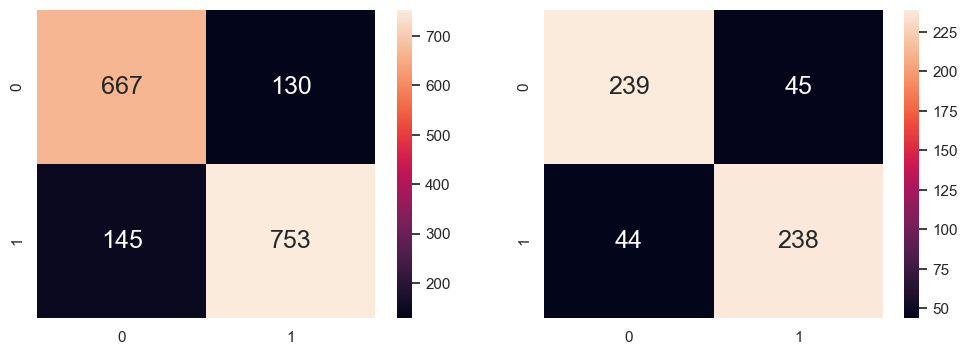

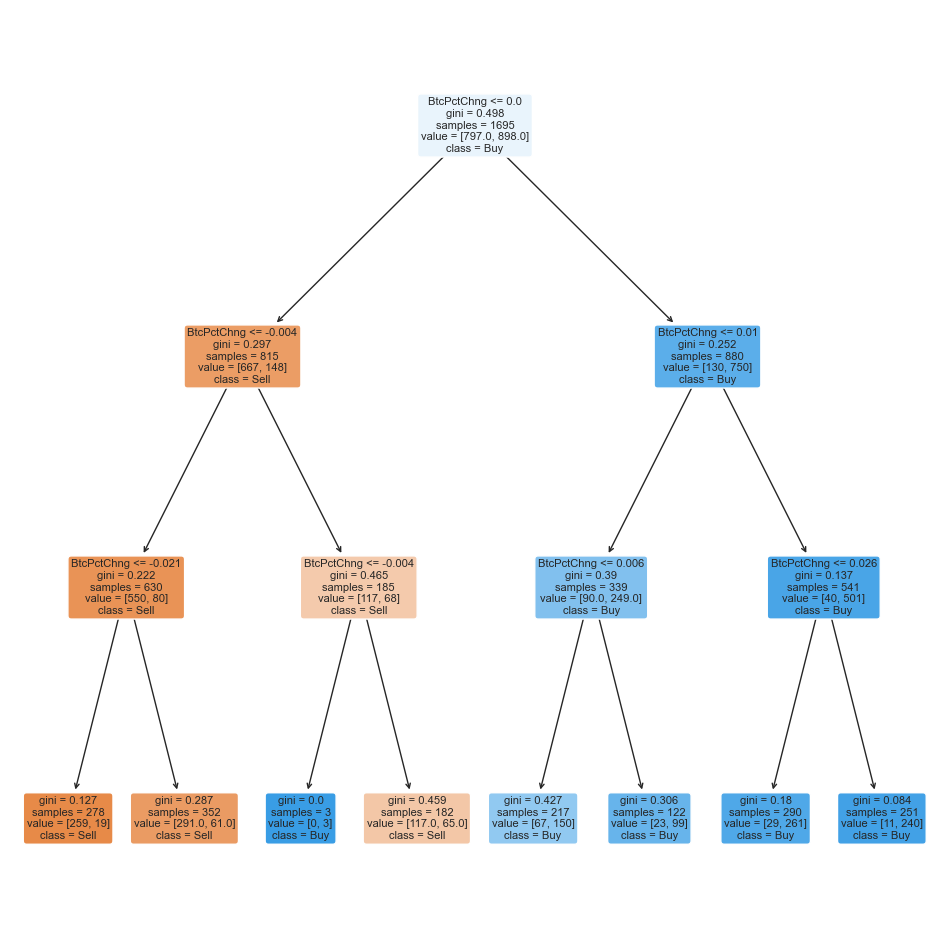

In [14]:
buy = pd.DataFrame(eth_bit_prices['Buy'])  # Response
bitpctchange = pd.DataFrame(eth_bit_prices['BtcPctChng'])      # Predictor

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(bitpctchange, buy, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["BtcPctChng"], 
          class_names=["Sell","Buy"])